In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import vincent as v

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

Importamos el data set

In [3]:
dt=pd.read_csv("owid-covid-data.csv")

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73384 entries, 0 to 73383
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               73384 non-null  object 
 1   continent                              69750 non-null  object 
 2   location                               73384 non-null  object 
 3   date                                   73384 non-null  object 
 4   total_cases                            72326 non-null  float64
 5   new_cases                              72324 non-null  float64
 6   new_cases_smoothed                     71323 non-null  float64
 7   total_deaths                           63170 non-null  float64
 8   new_deaths                             63328 non-null  float64
 9   new_deaths_smoothed                    71323 non-null  float64
 10  total_cases_per_million                71931 non-null  float64
 11  ne

In [5]:
dt["continent"].value_counts()

Africa           19274
Europe           17728
Asia             17523
North America     8660
South America     4476
Oceania           2089
Name: continent, dtype: int64

In [6]:
dt

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73379,ZWE,Africa,Zimbabwe,2021-03-03,36179.0,31.0,31.286,1478.0,6.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73380,ZWE,Africa,Zimbabwe,2021-03-04,36223.0,44.0,32.714,1483.0,5.0,3.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73381,ZWE,Africa,Zimbabwe,2021-03-05,36248.0,25.0,29.143,1484.0,1.0,3.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73382,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [7]:
dt_sa = dt

In [8]:
dt_sa['fecha'] = pd.to_datetime(dt_sa['date'])

Cantidad de entradas: cada entrada es una fecha determinada en un país determinado.

In [9]:
dt_sa.shape

(73384, 60)

In [10]:
mask_hoy = dt_sa["fecha"] == "2021-03-07"
dt_hoy = dt[mask_hoy]
dt_hoy.shape

(201, 60)

Nos quedamos solo con el última día de registro para cada país.

In [11]:
dt_hoy

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,fecha
377,AFG,Asia,Afghanistan,2021-03-07,55847.0,7.0,19.000,2449.0,0.0,0.857,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,2021-03-07
766,OWID_AFR,NaN,Africa,2021-03-07,3964055.0,8395.0,9535.429,105713.0,230.0,286.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-07
1143,ALB,Europe,Albania,2021-03-07,112897.0,819.0,818.571,1939.0,21.0,20.429,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,2021-03-07
1520,DZA,Africa,Algeria,2021-03-07,114234.0,130.0,163.143,3013.0,3.0,4.286,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,2021-03-07
1891,AND,Europe,Andorra,2021-03-07,11042.0,23.0,25.143,112.0,0.0,0.286,...,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,2021-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71932,VNM,Asia,Vietnam,2021-03-07,2512.0,11.0,9.143,35.0,0.0,0.000,...,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.704,2021-03-07
72343,OWID_WRL,NaN,World,2021-03-07,116843908.0,367495.0,390674.571,2593222.0,5245.0,8781.000,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,2021-03-07
72675,YEM,Asia,Yemen,2021-03-07,2473.0,29.0,26.857,651.0,1.0,2.429,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,2021-03-07
73030,ZMB,Africa,Zambia,2021-03-07,82421.0,410.0,555.286,1124.0,8.0,4.714,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,2021-03-07


Quitamos los registros "OWID" que son resumenes mundiales y regionales.

In [12]:
mask_owid = ~(dt_hoy["iso_code"].str.contains("OWID", case=False))
dt_hoy_ = dt_hoy[mask_owid]
dt_hoy_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 377 to 73383
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               191 non-null    object        
 1   continent                              191 non-null    object        
 2   location                               191 non-null    object        
 3   date                                   191 non-null    object        
 4   total_cases                            189 non-null    float64       
 5   new_cases                              189 non-null    float64       
 6   new_cases_smoothed                     189 non-null    float64       
 7   total_deaths                           178 non-null    float64       
 8   new_deaths                             178 non-null    float64       
 9   new_deaths_smoothed                    189 non-null    float6

Nos quedamos solo con los datos  de America del Sur

In [13]:
mask_sa = dt_hoy_["continent"] == "South America"
dt_hoy_sa = dt_hoy_[mask_sa]
dt_hoy_sa

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,fecha
3059,ARG,South America,Argentina,2021-03-07,2149636.0,2922.0,6038.714,52880.0,10.0,130.714,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,2021-03-07
8720,BOL,South America,Bolivia,2021-03-07,254273.0,323.0,751.857,11823.0,16.0,24.857,...,7.1,204.299,6.89,NaN,NaN,25.383,1.10,71.51,0.718,2021-03-07
9807,BRA,South America,Brazil,2021-03-07,11019344.0,80508.0,66869.286,265411.0,1086.0,1495.571,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,2021-03-07
13935,CHL,South America,Chile,2021-03-07,855785.0,5302.0,4451.429,21077.0,69.0,72.143,...,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18,0.851,2021-03-07
14713,COL,South America,Colombia,2021-03-07,2276656.0,3411.0,3566.571,60503.0,91.0,105.286,...,4.5,124.240,7.44,4.7,13.5,65.386,1.71,77.29,0.767,2021-03-07
19802,ECU,South America,Ecuador,2021-03-07,294503.0,1560.0,1192.571,16039.0,19.0,32.571,...,3.6,140.448,5.55,2.0,12.3,80.635,1.50,77.01,0.759,2021-03-07
28609,GUY,South America,Guyana,2021-03-07,8807.0,35.0,31.714,201.0,1.0,0.857,...,NaN,373.159,11.62,NaN,NaN,77.159,1.60,69.91,0.682,2021-03-07
52038,PRY,South America,Paraguay,2021-03-07,168043.0,1074.0,1224.143,3318.0,24.0,19.571,...,1.7,199.128,8.27,5.0,21.6,79.602,1.30,74.25,0.728,2021-03-07
52405,PER,South America,Peru,2021-03-07,1364964.0,6670.0,5871.571,47681.0,190.0,197.429,...,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,0.777,2021-03-07
63505,SUR,South America,Suriname,2021-03-07,8977.0,6.0,6.857,175.0,0.0,0.429,...,NaN,258.314,12.54,7.4,42.9,67.779,3.10,71.68,0.738,2021-03-07


Elegimos las columnas más representativas

In [14]:
sa =  dt_hoy_sa[['iso_code', 'continent', 'location', 'date', 'total_cases', 'total_deaths','total_cases_per_million', 'total_deaths_per_million', 'hosp_patients_per_million', 'total_tests', 'total_vaccinations', 'total_vaccinations_per_hundred', 'people_fully_vaccinated_per_hundred', 'population']]
sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 3059 to 71522
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             12 non-null     object 
 1   continent                            12 non-null     object 
 2   location                             12 non-null     object 
 3   date                                 12 non-null     object 
 4   total_cases                          12 non-null     float64
 5   total_deaths                         12 non-null     float64
 6   total_cases_per_million              12 non-null     float64
 7   total_deaths_per_million             12 non-null     float64
 8   hosp_patients_per_million            0 non-null      float64
 9   total_tests                          4 non-null      float64
 10  total_vaccinations                   6 non-null      float64
 11  total_vaccinations_per_hundr

In [15]:
code = sa.iso_code
code

3059     ARG
8720     BOL
9807     BRA
13935    CHL
14713    COL
19802    ECU
28609    GUY
52038    PRY
52405    PER
63505    SUR
70320    URY
71522    VEN
Name: iso_code, dtype: object

In [16]:
casosporpais = sa[["total_cases","iso_code"]]
casosporpais.sort_values("total_cases",ascending=False,inplace=True)
casosporpais.head(10)

,total_cases,iso_code
9807,11019344.0,BRA
14713,2276656.0,COL
3059,2149636.0,ARG
52405,1364964.0,PER
13935,855785.0,CHL
19802,294503.0,ECU
8720,254273.0,BOL
52038,168043.0,PRY
71522,142338.0,VEN
70320,63837.0,URY


In [17]:
casosporpais.set_index(["iso_code"],inplace=True)

In [18]:
total_cases = casosporpais.total_cases

In [19]:
labels = code
total_deaths = sa.total_deaths
total_deaths_per_million = sa.total_deaths_per_million
total_cases_per_million = sa.total_cases_per_million
total_vaccinations_per_hundred = sa.total_vaccinations_per_hundred

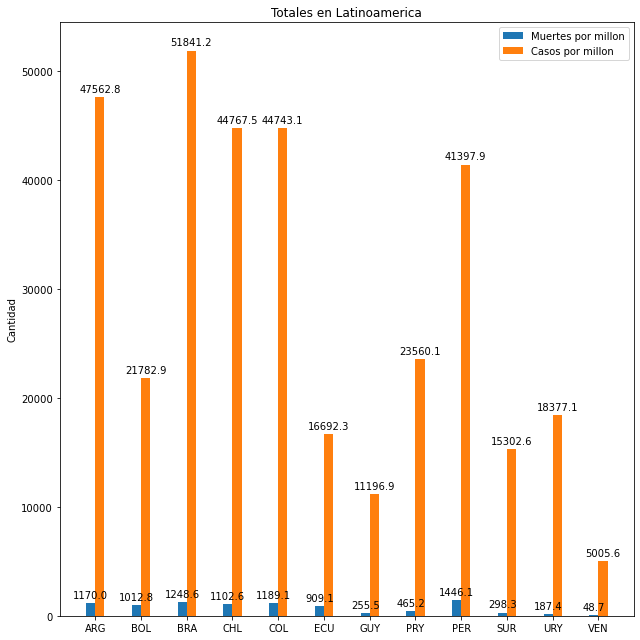

In [20]:
labels = labels
#a = round(total_vaccinations_per_hundred, 2)
b = round(total_deaths_per_million, 1)
c = round(total_cases_per_million, 1)
#d = round(total_deaths,1)
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(9, 9))
#rects1 = ax.bar(x - width/2, a, width, label='Vacunados por mil')
rects2 = ax.bar(x - width/2, b, width, label='Muertes por millon')
rects3 = ax.bar(x + width/2, c, width, label='Casos por millon')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad')
ax.set_title('Totales en Latinoamerica')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

En un principio nos guiamos con los países con mayor cantidad de casos confirmados.

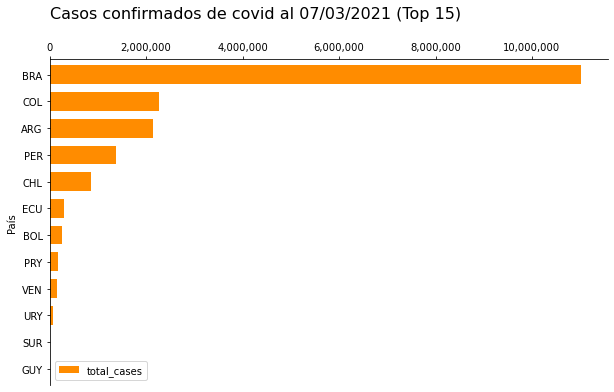

In [21]:
ax = casosporpais.head(15).plot(kind='barh',
                                     figsize=(10, 6),
                                     width=0.7,
                                     color='darkorange')
ax.set_title('Casos confirmados de covid al 07/03/2021 (Top 15)\n', fontsize=16,loc='left')
ax.set_ylabel("País")
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

## Usamos el numero de casos por millon de habitantes para normalizar y que el gráfico sea mas significativo

In [22]:
casosporpais_mill = sa[["total_cases_per_million","iso_code"]]
casosporpais_mill["total_cases_per_million"] = casosporpais_mill["total_cases_per_million"].round(0)
casosporpais_mill.sort_values("total_cases_per_million",ascending=False,inplace=True)
casosporpais_mill.set_index(["iso_code"],inplace=True)
casosporpais_mill.head(10)

,total_cases_per_million
iso_code,
BRA,51841.0
ARG,47563.0
CHL,44768.0
COL,44743.0
PER,41398.0
PRY,23560.0
BOL,21783.0
URY,18377.0
ECU,16692.0


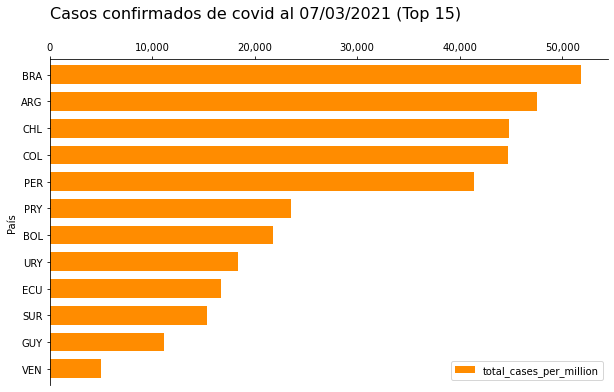

In [23]:
ax = casosporpais_mill.head(15).plot(kind='barh',
                                     figsize=(10, 6),
                                     width=0.7,
                                     color='darkorange')
ax.set_title('Casos confirmados de covid al 07/03/2021 (Top 15)\n', fontsize=16,loc='left')
ax.set_ylabel("País")
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
ax.xaxis.tick_top();

In [24]:
muertes_mill= sa[["total_deaths_per_million","iso_code"]]
muertes_mill.sort_values("total_deaths_per_million",ascending=False,inplace=True)
muertes_mill.set_index("iso_code",inplace=True)
muertes_mill

,total_deaths_per_million
iso_code,
PER,1446.113
BRA,1248.644
COL,1189.064
ARG,1170.021
CHL,1102.572
BOL,1012.848
ECU,909.083
PRY,465.193
SUR,298.312


## Visualización muertes, casos y vacunados para los paises más importantes de America del Sur: 
## Argentina, Brasil, Chile y Colombia.

In [25]:
mask_bra = dt["iso_code"] == "BRA"
dt_bra = dt[mask_bra]

mask_chl = dt["iso_code"] == "CHL"
dt_chl = dt[mask_chl]

mask_col = dt["iso_code"] == "COL"
dt_col = dt[mask_col]

mask_per = dt["iso_code"] == "PER"
dt_per = dt[mask_per]

In [26]:
dt_per.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [27]:
mask_bra = dt["iso_code"] == "BRA"
dt_bra = dt[mask_bra]

mask_chl = dt["iso_code"] == "CHL"
dt_chl = dt[mask_chl]

mask_col = dt["iso_code"] == "COL"
dt_col = dt[mask_col]

mask_per = dt["iso_code"] == "PER"
dt_per = dt[mask_per]

mask_arg = dt["location"] == "Argentina"
dt_arg = dt[mask_arg]

In [28]:
dt_bra_ =  dt_bra[['fecha','new_cases', 'new_cases_per_million', 'people_fully_vaccinated_per_hundred' ,'new_deaths', 'new_deaths_per_million', 'new_tests', 'new_vaccinations', 'new_cases_smoothed_per_million', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'new_deaths_smoothed_per_million' ]]
dt_chl_ =  dt_chl[['fecha','new_cases', 'new_cases_per_million', 'people_fully_vaccinated_per_hundred' ,'new_deaths', 'new_deaths_per_million', 'new_tests', 'new_vaccinations', 'new_cases_smoothed_per_million', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'new_deaths_smoothed_per_million' ]]
dt_col_ =  dt_col[['fecha','new_cases', 'new_cases_per_million', 'people_fully_vaccinated_per_hundred' ,'new_deaths', 'new_deaths_per_million', 'new_tests', 'new_vaccinations', 'new_cases_smoothed_per_million', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'new_deaths_smoothed_per_million' ]]
dt_per_ =  dt_per[['fecha','new_cases', 'new_cases_per_million', 'people_fully_vaccinated_per_hundred' ,'new_deaths', 'new_deaths_per_million', 'new_tests', 'new_vaccinations', 'new_cases_smoothed_per_million', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'new_deaths_smoothed_per_million' ]]
dt_arg_ =  dt_arg[['fecha','new_cases', 'new_cases_per_million', 'people_fully_vaccinated_per_hundred' ,'new_deaths', 'new_deaths_per_million', 'new_tests', 'new_vaccinations', 'new_cases_smoothed_per_million', 'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'new_deaths_smoothed_per_million' ]]

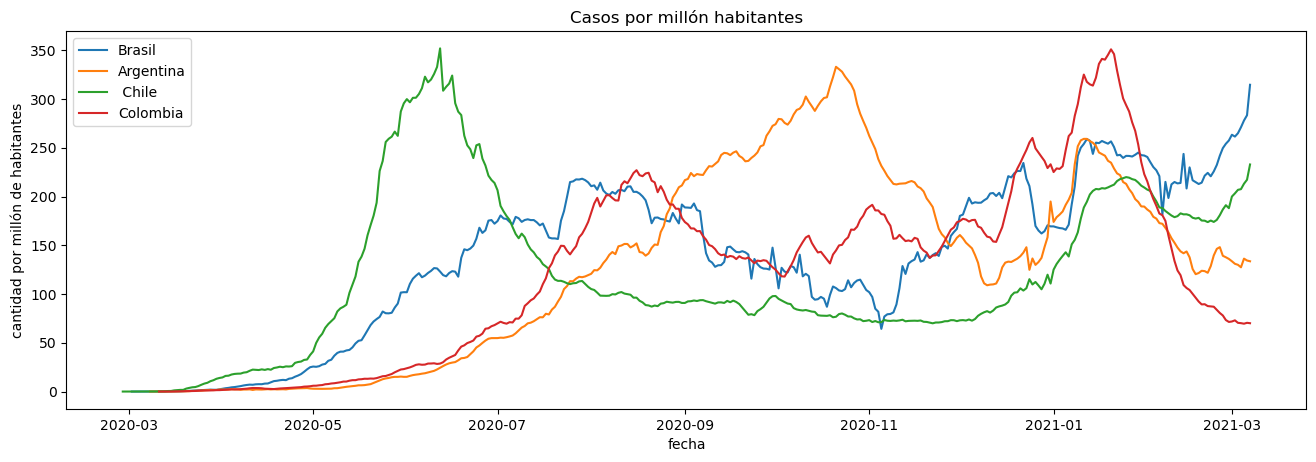

In [29]:
b = dt_bra_.new_cases_smoothed_per_million
a = dt_arg_.new_cases_smoothed_per_million
ch = dt_chl_.new_cases_smoothed_per_million
col = dt_col.new_cases_smoothed_per_million
x1 = dt_bra_.fecha
x2 = dt_arg_.fecha
x3 = dt_chl_.fecha
x4 = dt_col.fecha

# plot lines 
plt.figure(figsize=(16,5), dpi=100)
plt.plot(x1, b, label = "Brasil") 
plt.plot(x2, a, label = "Argentina")
plt.plot(x3, ch, label = " Chile")
plt.plot(x4, col, label = "Colombia")
plt.gca().set(title="Casos por millón habitantes", xlabel="fecha", ylabel="cantidad por millón de habitantes")
plt.legend() 
plt.show()

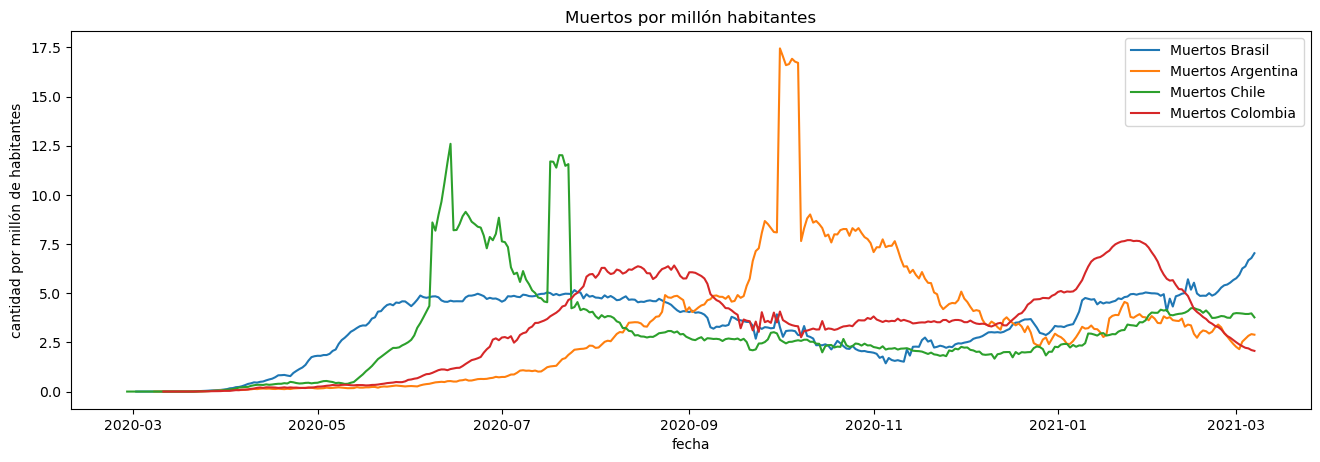

In [30]:
b = dt_bra_.new_deaths_smoothed_per_million
a = dt_arg_.new_deaths_smoothed_per_million
ch = dt_chl_.new_deaths_smoothed_per_million
col = dt_col_.new_deaths_smoothed_per_million
x1 = dt_bra_.fecha
x2 = dt_arg_.fecha
x3 = dt_chl_.fecha
x4 = dt_per_.fecha

# plot lines 
plt.figure(figsize=(16,5), dpi=100)
plt.plot(x1, b, label = "Muertos Brasil") 
plt.plot(x2, a, label = "Muertos Argentina")
plt.plot(x3, ch, label = "Muertos Chile")
plt.plot(x4, col, label = "Muertos Colombia")
plt.gca().set(title="Muertos por millón habitantes", xlabel="fecha", ylabel="cantidad por millón de habitantes")
plt.legend() 
plt.show()

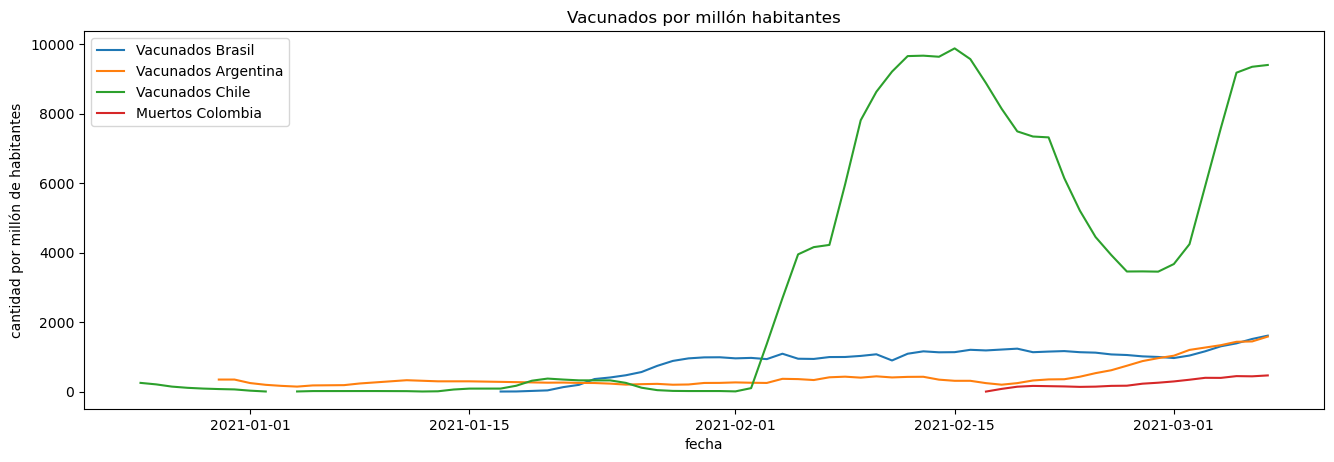

In [31]:
b = dt_bra_.new_vaccinations_smoothed_per_million
a = dt_arg_.new_vaccinations_smoothed_per_million
ch = dt_chl_.new_vaccinations_smoothed_per_million
col = dt_col_.new_vaccinations_smoothed_per_million
x1 = dt_bra_.fecha
x2 = dt_arg_.fecha
x3 = dt_chl_.fecha
x4 = dt_per_.fecha

# plot lines 
plt.figure(figsize=(16,5), dpi=100)
plt.plot(x1, b, label = "Vacunados Brasil") 
plt.plot(x2, a, label = "Vacunados Argentina")
plt.plot(x3, ch, label = "Vacunados Chile")
plt.plot(x4, col, label = "Muertos Colombia")
plt.gca().set(title="Vacunados por millón habitantes", xlabel="fecha", ylabel="cantidad por millón de habitantes")
plt.legend() 
plt.show()

In [32]:
dt_arg_['Month'] = pd.DatetimeIndex(dt_arg_['fecha']).month

In [33]:
dt_arg_.index = pd.PeriodIndex(dt_arg_.fecha, freq='D')
dt_arg_.head()

,fecha,new_cases,new_cases_per_million,people_fully_vaccinated_per_hundred,new_deaths,new_deaths_per_million,new_tests,new_vaccinations,new_cases_smoothed_per_million,new_vaccinations_smoothed,new_vaccinations_smoothed_per_million,new_deaths_smoothed_per_million,Month
fecha,,,,,,,,,,,,,
2020-01-01,2020-01-01,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1
2020-01-02,2020-01-02,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,1
2020-01-03,2020-01-03,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1
2020-01-04,2020-01-04,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,1
2020-01-05,2020-01-05,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,1


In [34]:
dummies_mes = pd.get_dummies(dt_arg_['Month'], drop_first=True, prefix='date')
dt_arg_ = dt_arg_.join(dummies_mes)

In [35]:
outlayer = dt_arg_["fecha"] == "2020-10-01"

In [36]:
dt_arg_["timeIndex"] = pd.Series(np.arange(len(dt_arg_['new_cases_per_million'])), index=dt_arg_.index)
dt_arg_.timeIndex

fecha
2020-01-01      0
2020-01-02      1
2020-01-03      2
2020-01-04      3
2020-01-05      4
             ... 
2021-03-03    427
2021-03-04    428
2021-03-05    429
2021-03-06    430
2021-03-07    431
Freq: D, Name: timeIndex, Length: 432, dtype: int64

In [37]:
dt_arg_.columns

Index(['fecha', 'new_cases', 'new_cases_per_million',
       'people_fully_vaccinated_per_hundred', 'new_deaths',
       'new_deaths_per_million', 'new_tests', 'new_vaccinations',
       'new_cases_smoothed_per_million', 'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'Month', 'date_2', 'date_3',
       'date_4', 'date_5', 'date_6', 'date_7', 'date_8', 'date_9', 'date_10',
       'date_11', 'date_12', 'timeIndex'],
      dtype='object')

In [38]:
# Función que plotea la serie:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Valor', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

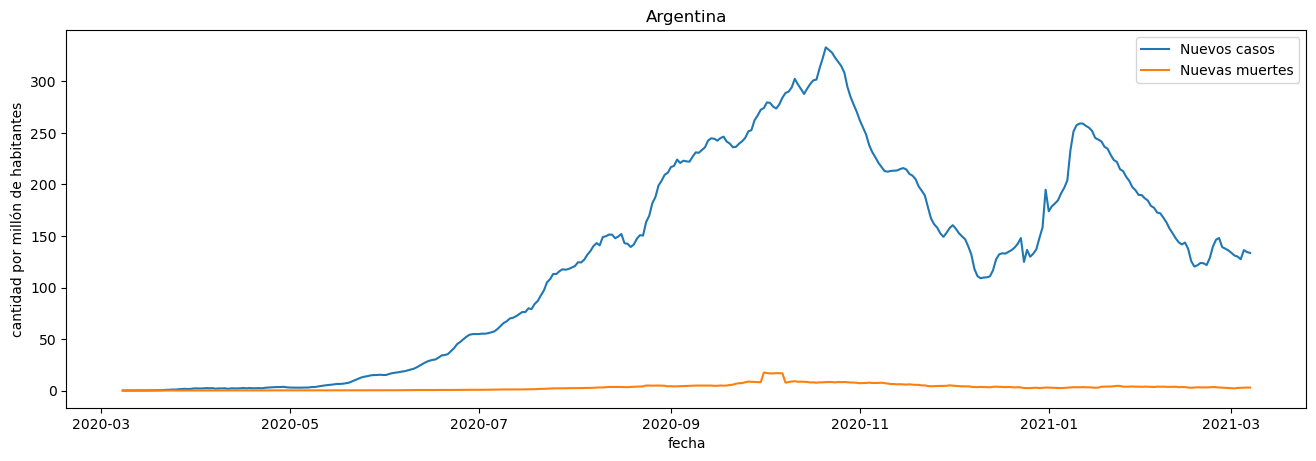

In [39]:
new_cases_per_million = dt_arg_.new_cases_smoothed_per_million
new_deaths_per_million = dt_arg_.new_deaths_smoothed_per_million
#people_fully_vaccinated_per_hundred = dt_arg_.new_vaccinations_smoothed_per_million
x = dt_arg_.fecha

# plot lines 
plt.figure(figsize=(16,5), dpi=100)
#plt.plot(x, people_fully_vaccinated_per_hundred, label = "Nuevos Vacunados") 
plt.plot(x, new_cases_per_million, label = "Nuevos casos")
plt.plot(x, new_deaths_per_million, label = "Nuevas muertes")
plt.gca().set(title="Argentina", xlabel="fecha", ylabel="cantidad por millón de habitantes")
plt.legend() 
plt.show()

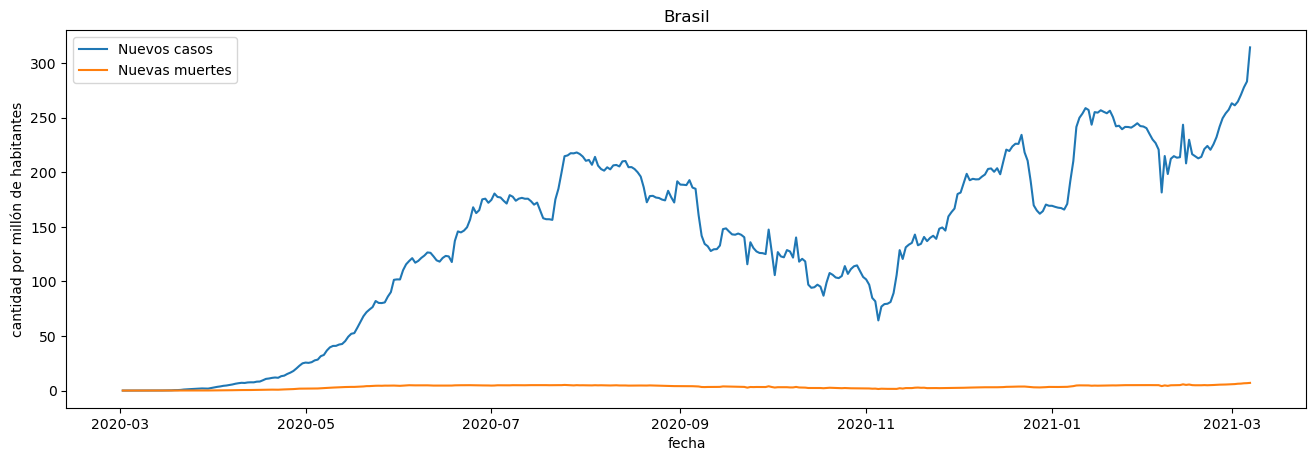

In [40]:
new_cases_per_million = dt_bra_.new_cases_smoothed_per_million
new_deaths_per_million = dt_bra_.new_deaths_smoothed_per_million
#people_fully_vaccinated_per_hundred = dt_bra_.new_vaccinations_smoothed_per_million
x = dt_bra_.fecha

# plot lines 
plt.figure(figsize=(16,5), dpi=100)
#plt.plot(x, people_fully_vaccinated_per_hundred, label = "Nuevos vacunados") 
plt.plot(x, new_cases_per_million, label = "Nuevos casos")
plt.plot(x, new_deaths_per_million, label = "Nuevas muertes")
plt.gca().set(title="Brasil", xlabel="fecha", ylabel="cantidad por millón de habitantes")
plt.legend() 
plt.show()

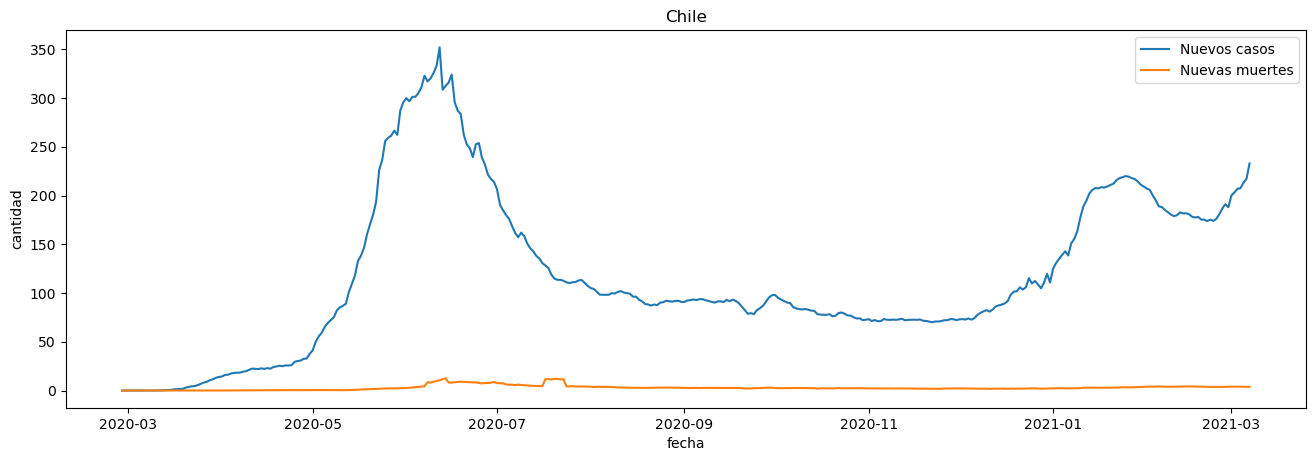

In [41]:
new_cases_per_million = dt_chl_.new_cases_smoothed_per_million
new_deaths_per_million = dt_chl_.new_deaths_smoothed_per_million
#people_fully_vaccinated_per_hundred = dt_chl_.new_vaccinations_smoothed_per_million
x = dt_chl_.fecha

# plot lines 
plt.figure(figsize=(16,5), dpi=100)
#plt.plot(x, people_fully_vaccinated_per_hundred, label = "Nuevos vacunados") 
plt.plot(x, new_cases_per_million, label = "Nuevos casos")
plt.plot(x, new_deaths_per_million, label = "Nuevas muertes")
plt.gca().set(title="Chile", xlabel="fecha", ylabel="cantidad")
plt.legend() 
plt.show()

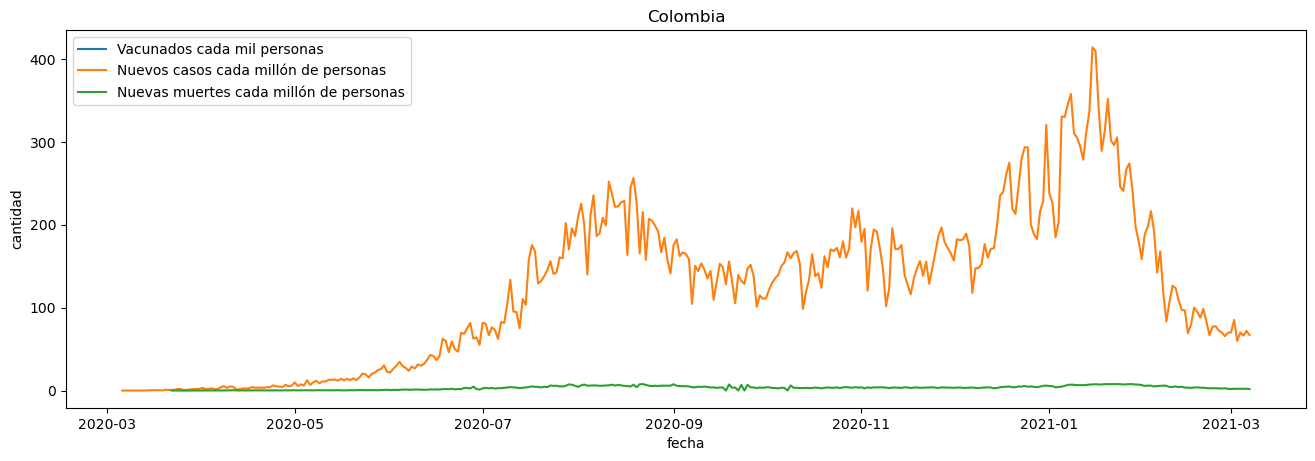

In [42]:
new_cases_per_million = dt_col_.new_cases_per_million
new_deaths_per_million = dt_col_.new_deaths_per_million
people_fully_vaccinated_per_hundred = dt_col_.people_fully_vaccinated_per_hundred
x = dt_col_.fecha

# plot lines 
plt.figure(figsize=(16,5), dpi=100)
plt.plot(x, people_fully_vaccinated_per_hundred, label = "Vacunados cada mil personas") 
plt.plot(x, new_cases_per_million, label = "Nuevos casos cada millón de personas")
plt.plot(x, new_deaths_per_million, label = "Nuevas muertes cada millón de personas")
plt.gca().set(title="Colombia", xlabel="fecha", ylabel="cantidad")
plt.legend() 
plt.show()

In [43]:
dt

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,fecha
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2020-02-24
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2020-02-25
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2020-02-26
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2020-02-27
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2020-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73379,ZWE,Africa,Zimbabwe,2021-03-03,36179.0,31.0,31.286,1478.0,6.0,3.143,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2021-03-03
73380,ZWE,Africa,Zimbabwe,2021-03-04,36223.0,44.0,32.714,1483.0,5.0,3.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2021-03-04
73381,ZWE,Africa,Zimbabwe,2021-03-05,36248.0,25.0,29.143,1484.0,1.0,3.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2021-03-05
73382,ZWE,Africa,Zimbabwe,2021-03-06,36260.0,12.0,28.857,1485.0,1.0,3.143,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2021-03-06


In [44]:
dt['Month'] = pd.DatetimeIndex(dt['fecha']).month

In [45]:
#dt.index = pd.PeriodIndex(dt.fecha, freq='D')

In [46]:
dtt = dt[["iso_code","new_cases_smoothed", 'fecha']]
dtt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73384 entries, 0 to 73383
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   iso_code            73384 non-null  object        
 1   new_cases_smoothed  71323 non-null  float64       
 2   fecha               73384 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.7+ MB


In [52]:
df = dtt

In [53]:
df

,iso_code,new_cases_smoothed,fecha
0,AFG,NaN,2020-02-24
1,AFG,NaN,2020-02-25
2,AFG,NaN,2020-02-26
3,AFG,NaN,2020-02-27
4,AFG,NaN,2020-02-28
...,...,...,...
73379,ZWE,31.286,2021-03-03
73380,ZWE,32.714,2021-03-04
73381,ZWE,29.143,2021-03-05
73382,ZWE,28.857,2021-03-06


In [56]:
A = df.pivot(index="iso_code", columns="fecha", values="new_cases_smoothed")

In [58]:
A

fecha,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-06,2021-03-07
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.286,18.143,15.714,16.571,16.143,15.143,13.571,18.714,19.000,19.000
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.143,40.429,41.143,43.714,42.571,40.429,40.857,38.143,39.000,39.857
AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1045.714,1021.857,988.714,949.429,931.000,906.714,886.857,867.429,837.571,818.571
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.286,25.286,23.857,25.286,24.143,24.714,25.286,25.143,24.286,25.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.714,16.000,17.143,19.143,22.143,20.286,17.143,20.571,25.000,26.857
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1443.000,1408.286,1371.000,1338.714,1318.429,1259.143,1220.286,1171.571,1140.143,1096.429
